## Importing Dependencies

In [ ]:
# Importing the Necessary libraries

import numpy as np
import pandas as pd
from google.colab import files

In [ ]:
# Reading the csv file as DataFrame

data = pd.read_csv("/content/Health_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Checking for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Looking at the correlation betweent the data

print(data.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [ ]:
# Checking for the "smoker" column 

import plotly.express as px
figure = px.histogram(data, x="sex", color="smoker", title="Number of Smokers")
figure.show()

In [ ]:
# Checking for the value count of smoker

data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
# Transforming string values to numerical values

data["sex"] = data["sex"].map({"female":0, "male":1})
data["smoker"] = data["smoker"].map({"no":0, "yes":1})
print(data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [ ]:
# Checking the distribution of regions 

import plotly.express as px
pie = data["region"].value_counts()
regions = pie.index
population = pie.values
fig = px.pie(data, values=population, names=regions)
fig.show()

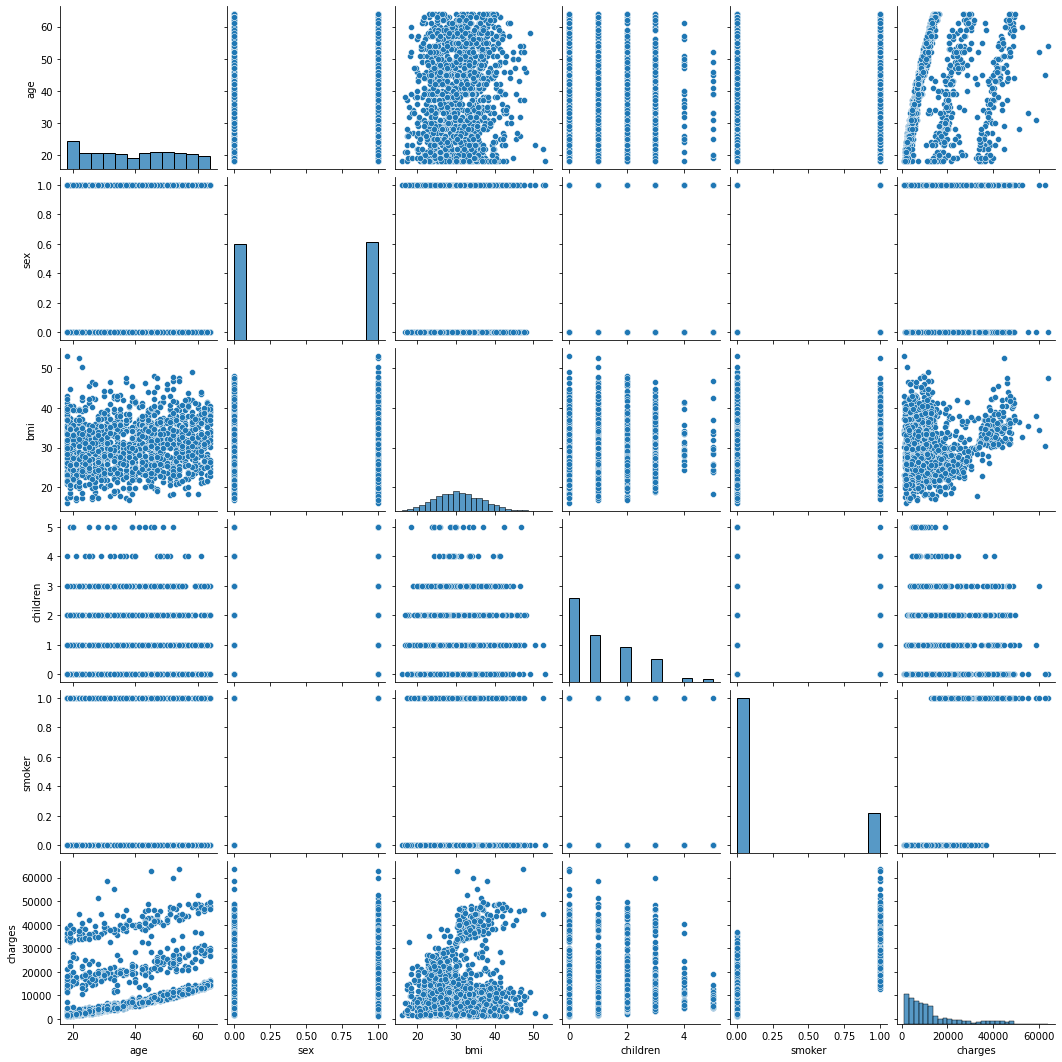

In [ ]:
import seaborn as sns

sns.pairplot(data)

# Health Insurance Premium Prediction Model

In [ ]:
X = np.array(data[["age", "sex", "bmi", "smoker"]])
y = np.array(data["charges"])

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(lr, X, y, cv=50)
print(cv)

[ 0.72878911  0.87208027  0.68981136  0.74026446  0.7887888   0.47863456
  0.90714117  0.8386124   0.42473604  0.8089997   0.8141563   0.62579331
  0.84680593  0.65257528  0.49983818  0.71848075  0.75042353  0.57217377
  0.81894811  0.42645348  0.82193813  0.72527576  0.74872891  0.80157111
  0.82639243  0.78993583  0.85585053  0.78536908  0.56262431  0.60171802
  0.80519178  0.84353202  0.74627278  0.85530646  0.23601335  0.79143988
 -0.0153052   0.4707425   0.63349792  0.87742293  0.79031482  0.81499893
  0.75459143  0.54807823  0.55165996  0.74441192  0.82269308  0.78119534
  0.79729594  0.61836038]


In [ ]:
print("Train score", lr.score(Xtrain, ytrain))
print("Test score", lr.score(Xtest, ytest))

Train score 0.7477875332764182
Test score 0.7428425881945426


In [ ]:
ypred = lr.predict(Xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(data.head())

   Predicted Premium Amount
0               3490.116060
1              17183.626898
2              28983.397791
3               3349.607924
4               3440.807967


## Pickle

In [96]:
import pickle

model = pickle.dump(lr, open("Model_Health_insurance.pkl", "wb"))

In [97]:
files.download("Model_Health_insurance.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
model = pickle.load(open("Model_Health_insurance.pkl", "rb"))

In [ ]:
model.predict([[24, 1, 30, 0]])

array([4044.59812537])